In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_original = pd.read_csv("2013_Accidents_UK.csv")
df = pd.read_csv("2013_Accidents_UK.csv")
len(df_original.columns)


36

# Visualization

To what extent does the light conditions effect the number of accidents

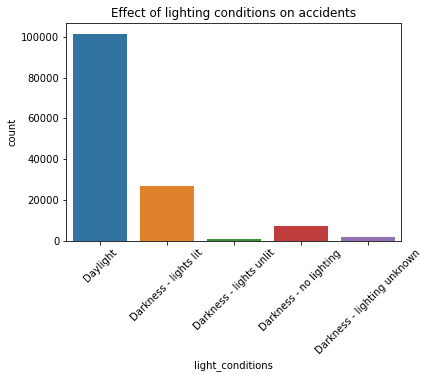

In [138]:
sns.countplot('light_conditions', data =df )
plt.title('Effect of lighting conditions on accidents')
plt.xticks(rotation=45)
plt.show()

To what extent does the area effect the number of accidents

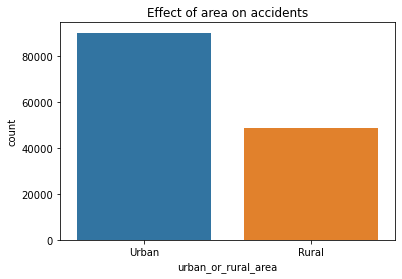

In [139]:
sns.countplot('urban_or_rural_area', data =df )
plt.title('Effect of area on accidents')
plt.show()


pedestrian_crossing_physical_facilities vs number of accidents

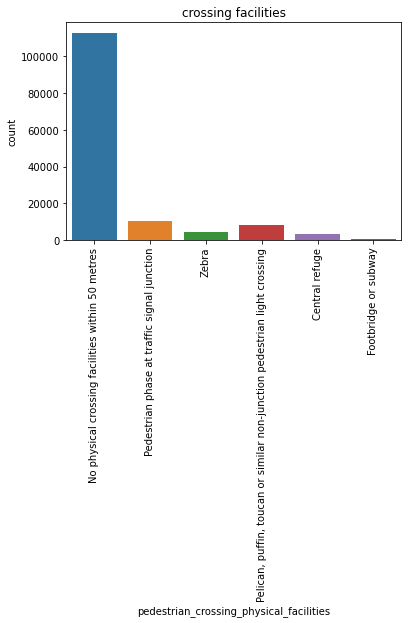

In [17]:
sns.countplot('pedestrian_crossing_physical_facilities', data =df )
plt.title('crossing facilities')
plt.xticks(rotation=90)
plt.show()


Effect of road type on accident occurence

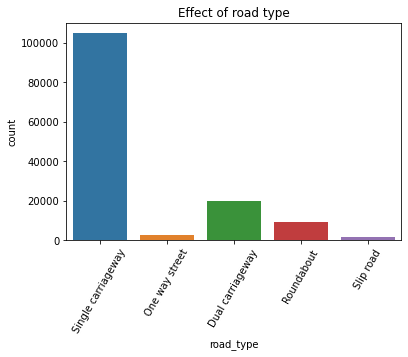

In [142]:
sns.countplot('road_type', data =df )
plt.title('Effect of road type')
plt.xticks(rotation=60)
plt.show()

Is there a relation between the speed limit and the number of accidents?

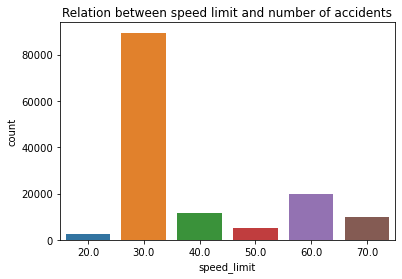

In [143]:
sns.countplot("speed_limit",data=df)
plt.title("Relation between speed limit and number of accidents")
plt.show()

Is there a relationship between the state of the accident and the road conditions

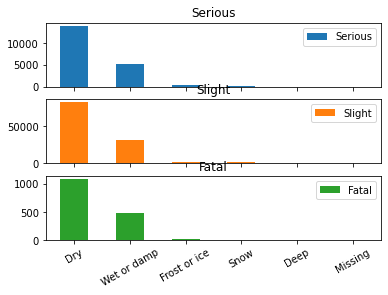

In [146]:
serious = df[df['accident_severity'] == "Serious"]
slight = df[df['accident_severity'] == "Slight"]
fatal = df[df['accident_severity'] == "Fatal"]

seriList = list(serious["road_surface_conditions"].value_counts().values)
sliList = list(slight["road_surface_conditions"].value_counts().values)
faList = list(fatal["road_surface_conditions"].value_counts().values)

index = ['Dry','Wet or damp','Frost or ice', 'Snow','Deep', 'Missing']
divisionDF = pd.DataFrame({'Serious':seriList,'Slight':sliList,'Fatal':faList},index=index)
ax = divisionDF.plot.bar(rot = 30, subplots=True)

# Cleaning

In some columns the missing values are camouflaged using -1 or the string "Missing" in order to explore the missing values and clean the data. Columns with camouflaged missing values will be converted to nulls

The following columns have been found to contain camouflaged null values and will therefore be cleaned:
1. Trunk Road Flag Column 

In [5]:
df_clean=df.copy()
print(df['trunk_road_flag'].value_counts()) #14874 values including "Data missing or out of range"
df_clean['trunk_road_flag'] = df_clean['trunk_road_flag'].replace('Data missing or out of range', np.nan)
df_clean['trunk_road_flag'] = df_clean['trunk_road_flag'].replace('Non-trunk', False)
df_clean['trunk_road_flag'] = df_clean['trunk_road_flag'].replace('Trunk (Roads managed by Highways England)', True)
df_clean["trunk_road_flag"].isnull().mean()*100 # 10.72% null

Non-trunk                                    113646
Data missing or out of range                  14874
Trunk (Roads managed by Highways England)     10140
Name: trunk_road_flag, dtype: int64


10.726958026828214

2. Carriageway Hazards Column

In [6]:
print(df['carriageway_hazards'].value_counts()) #2 values including "Data missing or out of range"
df_clean['carriageway_hazards'] = df_clean['carriageway_hazards'].replace('Data missing or out of range', np.nan)

None                                               136232
Other object on road                                  972
Any animal in carriageway (except ridden horse)       734
Pedestrian in carriageway - not injured               376
Previous accident                                     211
Vehicle load on road                                  133
Data missing or out of range                            2
Name: carriageway_hazards, dtype: int64


3. Junction Detail

In [7]:
print(df['junction_detail'].value_counts()) # 8 values including "Data missing or out of range"
df_clean['junction_detail'] = df_clean['junction_detail'].replace('Data missing or out of range', np.nan)
df_clean["junction_detail"].isnull().mean()*100 # 0.0057% null

Not at junction or within 20 metres    54693
T or staggered junction                44334
Crossroads                             13692
Roundabout                             12439
Private drive or entrance               5516
Other junction                          2984
Slip road                               1972
Mini-roundabout                         1796
More than 4 arms (not roundabout)       1226
Data missing or out of range               8
Name: junction_detail, dtype: int64


0.005769508149430261

4. Junction Control

In [8]:
print(df['junction_control'].value_counts()) # 54808 values including "Data missing or out of range"
df_clean['junction_control'] = df_clean['junction_control'].replace('Data missing or out of range', np.nan)
df_clean["junction_control"].isnull().mean()*100 # 39.52% null

Give way or uncontrolled        68517
Data missing or out of range    54808
Auto traffic signal             14474
Stop sign                         676
Authorised person                 185
Name: junction_control, dtype: int64


39.52690033174672

5. Second Road Class

In [9]:
print(df["second_road_class"].value_counts()) 
df_clean['second_road_class'] = df_clean['second_road_class'].replace('-1', np.nan)
df_clean["second_road_class"].isnull().mean()*100 #40.302899177845084% null

-1              55884
Unclassified    55719
A               13890
C                6599
B                5576
Motorway          905
A(M)               87
Name: second_road_class, dtype: int64


40.302899177845084

6. Did Police Officer Attend

In [11]:
print(df["did_police_officer_attend_scene_of_accident"].value_counts()) #1 entry including "Data missing or out of range'
df_clean['did_police_officer_attend_scene_of_accident'].replace('Data missing or out of range', np.nan, inplace=True)

Yes                             113358
No                               25301
Data missing or out of range         1
Name: did_police_officer_attend_scene_of_accident, dtype: int64


7. LSOA of accident location

In [12]:
print(df["lsoa_of_accident_location"].value_counts() )
df_clean['lsoa_of_accident_location'].replace('-1', np.nan, inplace=True)
df_clean['lsoa_of_accident_location'].replace(-1, np.nan, inplace=True)
df_clean["lsoa_of_accident_location"].value_counts() 
df_clean['lsoa_of_accident_location'].isnull().mean()*100 # 7.04% missing

-1           7588
-1           2176
E01032739     206
E01004736     155
E01033595     108
             ... 
E01027979       1
E01028248       1
E01027938       1
E01028267       1
E01014191       1
Name: lsoa_of_accident_location, Length: 28787, dtype: int64


7.041684696379634

# Observing Missing Values

road_type                                       0.354825
junction_detail                                 0.005770
junction_control                               39.526900
second_road_class                              40.302899
second_road_number                             40.303620
weather_conditions                              1.786384
carriageway_hazards                             0.001442
did_police_officer_attend_scene_of_accident     0.000721
trunk_road_flag                                10.726958
lsoa_of_accident_location                       7.041685
dtype: float64


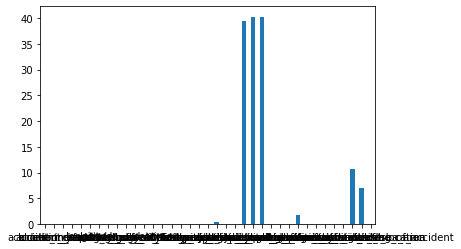

In [28]:
import missingno as msno
import matplotlib.pyplot as plt

percent_missing = df_clean.isnull().mean() * 100 
# missing_value_df = pd.DataFrame({'column_name': df.columns,
#                                  'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', inplace=True)
print(percent_missing [percent_missing>0])

ax = percent_missing.plot.bar(x='columns', y='missing', rot=0)


The heat map below shows a correlation in the missing values of "junction_detail", "second_road_number" & "second_road_class". Whenever there was no junction, then by default there doesn't exist a second road that the accident occured at. Since there is a missing pattern in the data and other observed columns explain the pattern then they are missing at random (MAR)

<AxesSubplot:>

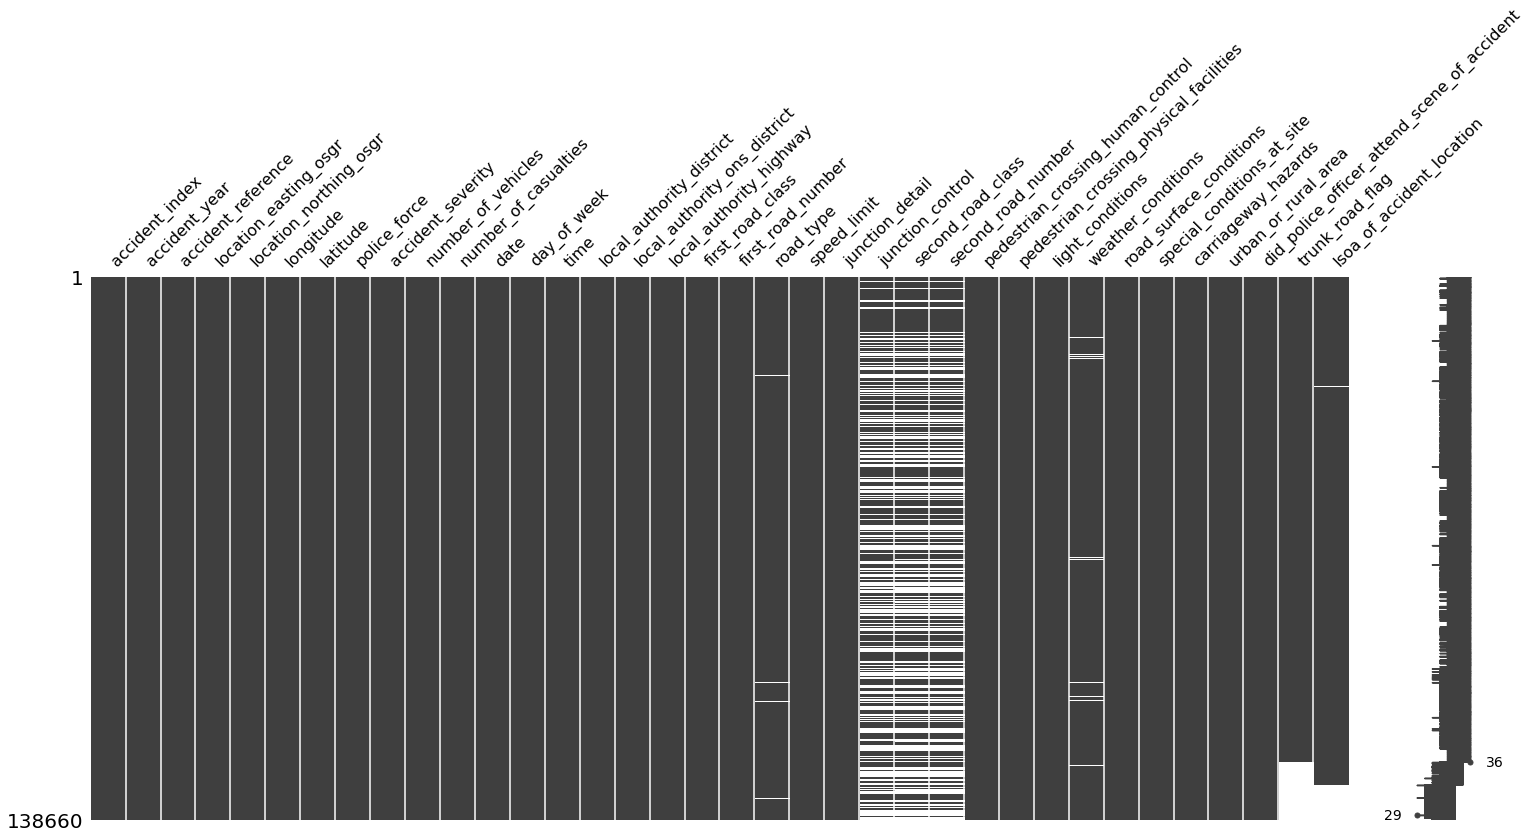

In [14]:
msno.matrix(df_clean)

Around 7% of the "lsoa_of_accident_location" is missing. When plotting the longitude and latude in the scatter plot. The red dots represent longitudes & latitudes with a corresponding lsoa area assigned. The pattern shows that the missing mechanism was not random. A consecutive group of areas where not assigned their LSOA. There is a pattern an other observed columns do not explain the pattern. Therefore it is thought of as missing not at random. (MNAR)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

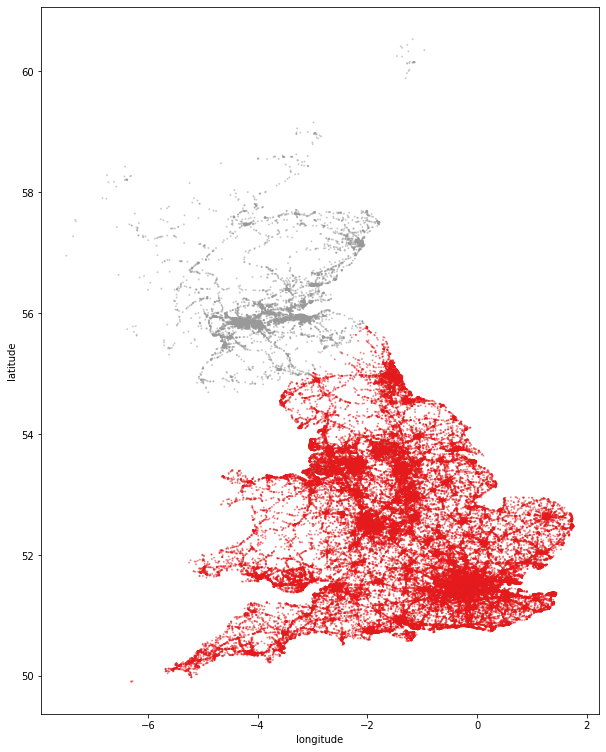

In [15]:
df_clean['is_assigned_lsoa_area'] =  df_clean['lsoa_of_accident_location'].isna()
df_clean.plot(kind="scatter", x="longitude", y="latitude", figsize = (10,13), alpha=0.4,s=1,
            c=df_clean["is_assigned_lsoa_area"], cmap=plt.get_cmap("Set1"), colorbar=False,
            sharex=False)

trunk_road_flag -- > MNAR

In [51]:
# df_clean['first_road_class'].unique()
# df_clean['trunk_road'].unique()
filtered_df = df_clean[df_clean['trunk_road_flag'].notnull()]
filtered_df_2 = filtered_df[filtered_df['trunk_road_flag']==True]
filtered_df_2['first_road_class'].value_counts()

A           5344
Motorway    4482
A(M)         314
Name: first_road_class, dtype: int64

In [52]:
df_clean['junction_detail']

0                     T or staggered junction
1                                  Crossroads
2                                  Crossroads
3                                  Crossroads
4                     T or staggered junction
                         ...                 
138655                              Slip road
138656                T or staggered junction
138657                T or staggered junction
138658                T or staggered junction
138659    Not at junction or within 20 metres
Name: junction_detail, Length: 138660, dtype: object

# Observing Outliers

In [ ]:
#Habiba's code

# Handling Unclean Data
 **Filling Missing Values**
 
 1. lsoa_of_accident_location column : 7% missing.
 
 To fill in these missing values, the csv file LSOA was downloaded from the official uk website: 
https://geoportal.statistics.gov.uk/datasets/e9d10c36ebed4ff3865c4389c2c98827_0/explore?location=53.456026%2C-1.883443%2C10.53&showTable=true
The csv file included all LSOA areas in UK and their corresponding longitudes and latitudes.
Since UK is divided to more than 34,000 areas. Our missing areas only lie at a latitude greater than 54.5 then we'll extract these areas from the lsoa csv to reduce computaional complexity. Hence we will be searching searching for nearest distance in 1800 area instead of 34,000

In [54]:
lsoa_df= pd.read_csv("LSOA.csv")
lsoa_df.drop(lsoa_df.columns.difference(['LSOA11CD','LONG', 'LAT']), 1, inplace=True)
lsoa_df.loc[lsoa_df['LAT']>54.5]

,LSOA11CD,LONG,LAT
7948,E01008162,-1.58915,54.95797
7949,E01008163,-1.60044,54.95522
7950,E01008164,-1.58222,54.95385
7951,E01008165,-1.59026,54.95336
7952,E01008166,-1.59166,54.96382
...,...,...,...
32789,E01033714,-1.79579,55.06365
32790,E01033715,-1.70418,55.41079
32791,E01033716,-1.53953,55.16957
32792,E01033717,-1.70984,55.40682


The distance function below calculates the distance between 2 location given their longitudes and latitudes. It was used to find the nearest LSOA

In [56]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    hav = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(hav))

def closest(row):
    closest =  min(lsoa_records, key=lambda p: distance(row['latitude'], row['longitude'],p['LAT'],p['LONG']))
    return closest['LSOA11CD']

lsoa_records = lsoa_df.to_dict('records')
df_clean['lsoa_imputed'] = df_clean.loc[df_clean['lsoa_of_accident_location'].isna()].apply(lambda x: closest(x), axis=1)


In [69]:
print("Percentage of Missing values: ",df_clean['lsoa_of_accident_location'].isna().mean()*100)
print("Number of Unique Values: ", df_clean['lsoa_of_accident_location'].nunique())
df_clean['lsoa_of_accident_location'].value_counts()

Percentage of Missing values:  7.041684696379634
Number of Unique Values:  28785


E01032739    206
E01004736    155
E01033595    108
E01004689     79
E01002444     71
            ... 
E01019523      1
E01019418      1
E01019625      1
E01019642      1
W01000479      1
Name: lsoa_of_accident_location, Length: 28785, dtype: int64

In [73]:
df_clean["lsoa_of_accident_location"].fillna(df_clean["lsoa_imputed"], inplace=True)
print("Percentage of Missing values",df_clean['lsoa_of_accident_location'].isna().mean()*100)
print("Number of Unique Values: ", df_clean['lsoa_of_accident_location'].nunique())
df_clean['lsoa_of_accident_location'].value_counts()

Percentage of Missing values 0.0
Number of Unique Values:  28873


E01027382    2955
E01027378    2181
E01019107    1828
E01019126    1305
E01019228     430
             ... 
E01021837       1
E01005801       1
E01021419       1
E01006003       1
E01019291       1
Name: lsoa_of_accident_location, Length: 28873, dtype: int64

2. Dropping columns where missing % is <2% and the missing pattern is assumed to be MCAR

**Handling Outliers**

In [ ]:
#Habiba's code
#With every change you are making to the data you need to comment on why you used this technique and how has it affected the data
# (by both showing the change in the data i.e change in number of rows/columns, change in distribution, etc. and commenting on it).

**Handling Noise & Inconsistencies**

In [ ]:
# Mariam's Code
#With every change you are making to the data you need to comment on why you used this technique and how has it affected the data
# (by both showing the change in the data i.e change in number of rows/columns, change in distribution, etc. and commenting on it).
df['date']=  pd.to_datetime(df['date'])
df["day"] = df['date'].map(lambda x: x.day)
df["month"] = df['date'].map(lambda x: x.month)
df = df.drop(['date'], axis = 1)
df.columns

In [ ]:
import datetime
dateTimeInstance1 = datetime.datetime(2021, 8, 1)
dayOfTheWeek1 = dateTimeInstance1.weekday()
print(dayOfTheWeek1)

In [ ]:
def assignDays(number):
    if number == 0:
        return "Monday"
    elif number == 1:
        return "Tuesday"
    elif number == 2:
        return "Wednesday"
    elif number == 3:
        return "Thursday"
    elif number == 4:
        return "Friday"
    elif number == 5:
        return "Saturday"
    elif number == 6:
        return "Sunday"

In [ ]:
from calendar import monthrange
def validateDates(day,month,year):
    output = False
    if ((month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12)  and (day<32)):
        output = True
    if ((month == 4 or month == 6 or month == 9 or month == 11) and (day<31)):
        output = True
    if ((month == 2) and ( (day<=28) or (day<=29)) and (year != 2013)):
        output = True
    if month == 2:
        tuple = monthrange(year, 2)
        if(day<=(tuple[1])):
            output = True
    return output



In [ ]:
## date
## day_of_week
dateColumn = df["date"]
dayOfWeekColumn = df["day_of_week"]
month = 0
day = 0
newColumns = []
for i in range(len(dateColumn)):
    date = dateColumn.iloc[i]
    arrayOfDate = date.split('/')
    if(int(arrayOfDate[0])<10):
        day = int((arrayOfDate[0])[1:])
    if(int(arrayOfDate[1])<10):
        month = int((arrayOfDate[1])[1:])
    elif(int(arrayOfDate[0])>9):
        day = int((arrayOfDate[0]))
    elif(int(arrayOfDate[1])>9):
        month = int((arrayOfDate[1]))
    year = int(arrayOfDate[2])
    validDate = validateDates(day=day,month=month,year=year)
    if validDate == True:
        dateTime = datetime.datetime(year, month, day)
        dayOfDate = dateTime.weekday()
        if assignDays(dayOfDate) == dayOfWeekColumn.iloc[i]:
            newColumns.insert(i, True)
        else:
            newColumns.insert(i, False)
    
tempDataFrame = pd.DataFrame({'checks':newColumns})
tempDataFrame[tempDataFrame["checks"] == False]


# Data Transformation

1. Urban or Rural Area Column

In [76]:
print(df_clean['urban_or_rural_area'].value_counts())
df_clean['urban_or_rural_area'] = df_clean['urban_or_rural_area'].replace('Urban', 1)
df_clean['urban_or_rural_area'] = df_clean['urban_or_rural_area'].replace('Rural', 0)
df_clean['urban_or_rural_area'].value_counts()

Urban    90000
Rural    48660
Name: urban_or_rural_area, dtype: int64


1    90000
0    48660
Name: urban_or_rural_area, dtype: int64

2. Accident Severity Column

In [77]:
print(df_clean['accident_severity'].value_counts())
df_clean['accident_severity'] = df_clean['accident_severity'].replace('Fatal', 2)
df_clean['accident_severity'] = df_clean['accident_severity'].replace('Serious', 1)
df_clean['accident_severity'] = df_clean['accident_severity'].replace('Slight', 0)
df_clean['accident_severity'].value_counts()


Slight     117467
Serious     19585
Fatal        1608
Name: accident_severity, dtype: int64


0    117467
1     19585
2      1608
Name: accident_severity, dtype: int64

In [8]:
# Dropping the accident year coumn because all accidents occured in the same year
df = df.drop(['accident_year'], axis = 1)

In [9]:
# Columns should contain atomic properties that cannot be further decomposed
# split date to month & day. No need for year (all of them are in 2013).
df['date']=  pd.to_datetime(df['date'])
df["day"] = df['date'].map(lambda x: x.day)
df["month"] = df['date'].map(lambda x: x.month)
df.columns



/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/alaaabdelazeem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:10

Index(['accident_index', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'day', 'month'],
      dtype='object')